In [49]:
import numpy
import matplotlib.pyplot
import scipy.special
%matplotlib inline

In [50]:
train_file = open("mnist/mnist_train.csv", "r")
train_list = train_file.readlines()
train_file.close()

In [51]:
#neural network class
class NeuralNetwork:
    def __init__(self, ipnodes, hnodes, opnodes, lrate):
        """
        Initialises the neural network with input hyperparameters
        """
        self.inodes = ipnodes
        self.hnodes = hnodes
        self.onodes = opnodes
        self.lr = lrate
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_f = lambda x: scipy.special.expit(x)
        
    def printer(self):
        """
        Basic helper function
        """
        print(f'Input nodes: {self.inodes}')
        print(f'Hidden nodes: {self.hnodes}')
        print(f'Output nodes: {self.onodes}')
        print(f'Learning rate: {self.lr}')
        print(f'Input-hidden weights: \n{self.wih}\n')
        print(f'Hidden-output weights:\n{self.who}\n')
        
    def train(self, inputs_list, targets_list):
        """
        This function will train the neural network
        """
        
        
        #math implementation
        inputs = numpy.array(inputs_list, ndmin = 2).T    #changing the orientation of input array
        
        hidden_inputs = numpy.dot(self.wih, inputs)       #hidden inputs are calculated
        hidden_outputs = self.activation_f(hidden_inputs) #hidden outputs from the hidden layer are computed with sigmoid activation
        
        final_inputs = numpy.dot(self.who, hidden_outputs)#a similar computation for the final layer
        final_outputs = self.activation_f(final_inputs)
        
        targets = numpy.array(targets_list, ndmin = 2).T  #changing the orientation of target values
        
        output_errors = targets - final_outputs           #to redefine weights between hidden and output layers
        
        hidden_errors = numpy.dot(self.who.T, output_errors) #to redefine weights between input and hidden layers
        
        #apply gradient descent weight update equation to weights connecting hidden and output layer
        self.who += self.lr*numpy.dot(output_errors*final_outputs*(1 - final_outputs), numpy.transpose(hidden_outputs))
        
        #apply gradient descent weight update equation to weights connecting input and hidden layer
        self.wih += self.lr*numpy.dot(hidden_errors*hidden_outputs*(1 - hidden_outputs), numpy.transpose(inputs))
        
    
    def query(self, inputs_list):
        """
        test function
        """
        
        # an identical feed forward computation is implemented here, the only difference is that weights are not updated
        inputs = numpy.array(inputs_list, ndmin = 2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_f(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_f(final_inputs)
        
        return final_outputs    

Enter the index of an image to see it, and its correct label5555
Correct Label: 0


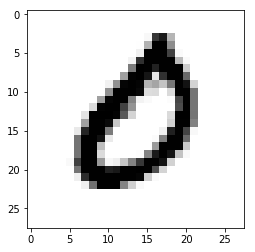

In [52]:
n = input('Enter the index of an image to see it, and its correct label: ')
all_values = train_list[int(n)].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')
print('Correct Label:', all_values[0])

In [53]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.4

NN = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [54]:
#training the NN
epochs = 5

for i in range(epochs):
    print("epoch: ", i)
    #go through all the records in the training set
    for record in training_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:])/255*0.99) + 0.01
        targets = numpy.zeros(10) + 0.01
        targets[int(all_values[0])] = 0.99
        NN.train(inputs, targets)
        pass
    pass

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4


In [56]:
test_file = open("mnist/mnist_test.csv", "r")
test_list = test_file.readlines()
test_file.close()

In [57]:
#testing the NN
scorecard = []

for record in test_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:])/255*0.99) + 0.01
    
    outputs = NN.query(inputs)
    
    label = numpy.argmax(outputs)
    
    if (label == correct_label):
        scorecard.append(1)
        
    else:
        scorecard.append(0)
        pass
    pass

In [61]:
#performance
scorecard_array = numpy.asfarray(scorecard)
print("performance: ", scorecard_array.sum() / scorecard_array.size)

performance:  0.932
